In [9]:
import requests

url = "https://maps.googleapis.com/maps/api/js/GeoPhotoService.GetMetadata?pb=!1m4!1sapiv3!11m2!1m1!1b0!2m2!1sen!2sUS!3m3!1m2!1e2!2sdbHBMuoJ-rGnr5yf0oG3Mg!4m57!1e1!1e2!1e3!1e4!1e5!1e6!1e8!1e12!2m1!1e1!4m1!1i48!5m1!1e1!5m1!1e2!6m1!1e1!6m1!1e2!9m36!1m3!1e2!2b1!3e2!1m3!1e2!2b0!3e3!1m3!1e3!2b1!3e2!1m3!1e3!2b0!3e3!1m3!1e8!2b0!3e3!1m3!1e1!2b0!3e3!1m3!1e4!2b0!3e3!1m3!1e10!2b1!3e2!1m3!1e10!2b0!3e3&callback=_callbacks____1olbhalsb2"

content = requests.get(url)

In [10]:
data = content.text
coords = data.split('[[null,null')[1].split(']')[0][1:].split(',')
coords = [float(coord) for coord in coords]

<AxesSubplot: >

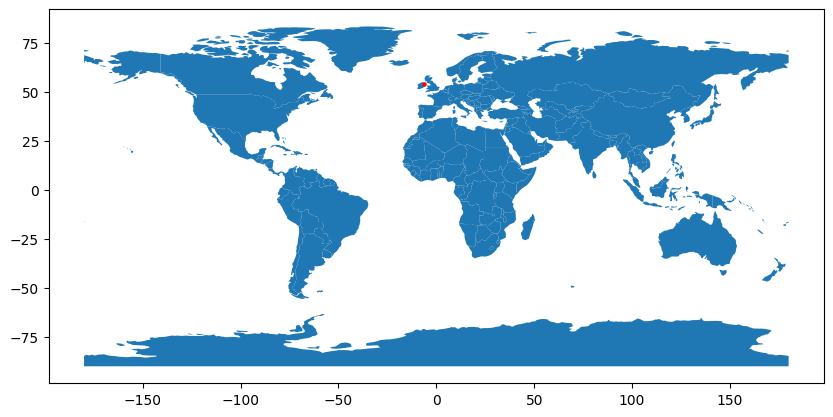

In [11]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


lat = coords[0]
long = coords[1]



df = pd.DataFrame(columns=['Latitude','Longitude'],
                  data=[[lat, long]])

geometry = [Point(long, lat)]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=5)


In [12]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.geoguessr.com/duels/bd49f6f3-5e45-49ad-81b5-092e840a9d96'
content = requests.get(url).text